# ECE6530 DSP Group 3 Project
# Lab P-9 Convolution, and FIR Filtering, Exercise 3.1
### Group Members: Grant Brown, Thomas Warren, Rick Lyon

In [1]:
# Load the required libraries
import matplotlib.pyplot as plt
import numpy as np

from IPython import display
from scipy.io import loadmat, wavfile

np.set_printoptions(suppress=True, precision=2)
plt.rc("xtick", direction="inout", labelsize="x-small")
plt.rc("ytick", direction="inout", labelsize="x-small")

def stem_plot(
    ax: plt.Axes, xd, yd, color="teal", markersize=6, linestyle="solid", label=None
):
    """Create customized stem plot on axes with data (xd, yd)"""
    markerline, stemlines, baseline = ax.stem(xd, yd, label=label)
    plt.setp(stemlines, color=color, linestyle=linestyle)
    plt.setp(markerline, markersize=markersize, color=color)

%config InlineBackend.figure_formats = ['svg']

# 3.1 - Deconvolution Experiment for 1-D Filters

Implement the following FIR filter
$$ w[n] = x[n] - 0.9x[n-1]$$
on the input signal x[n] defined via the MATLAB statement: 
```
xx = 256*(rem(0:100,50)<10);
```
In MATLAB you must define the vector of filter coefficients bb needed in `firfilt`.

## (a) 

Plot both the input and output waveforms x[n] and w[n] on the same figure, using subplot. Make the discrete-time signal plots with MATLAB’s stem function, but restrict the horizontal axis to the range $0 \leq n \leq 75$.  
Explain why the output appears the way it does by figuring out (mathematically) the effect of the filter coefficients in (3).

The output is the difference of the current sample n and the previous sample at n-1 with an scalar of 0.9 applied to the previous sample. The scalar causes the difference to be nonzero and 0.1 times the previous value. The edges of x[n] are visible due to the difference equation causing the value to be 0.9 times the previous value. The effect of the filter coefficients is essentially an edge detection or derivative filter.

Text(0.5, 0, 'Samples')

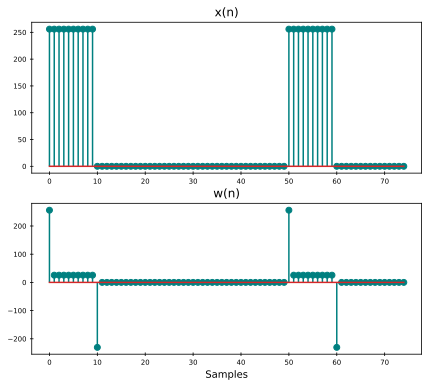

In [2]:
# create xn signal
n = np.arange(0, 101)
x_n = 256 * ((n % 50) < 10)

# apply difference FIR filter to create wn
w_n = np.convolve([1, -0.9], x_n)

#Plot the input and output signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))
stem_plot(ax1, n[0:75], x_n[0:75])
stem_plot(ax2, n[0:75], w_n[0:75])

ax1.set_title("x(n)")
ax2.set_title("w(n)")
ax2.set_xlabel("Samples")

## (b) 

Note that w[n] and x[n] are not the same length. Determine the length of the filtered signal w[n], and explain how its length is related to the length of x[n] and the length of the FIR filter. (If you need a hint refer to Section 1.2.)

The FIR filter in this example has coefficients $bb = [1 0.9]$, so it is length 2. The output of the convolution can be determined by the length of the two sequences given as inputs to the convolution operation, which in this case would be:
$$
\mathrm{len}(w[n]) = \mathrm{len}(x[n]) + \mathrm{len}(bb) -1 = 101 + 2 - 1 = 102
$$

# 3.1.1 Restoration Filter
------

The following FIR filter:
$$ y[n] = \sum_{l=0}^{M} r^l w[n-l] $$
can be use to undo the effects of the FIR filter in the previous section. It performs restoration, but it only does this approximately. Use the following steps to show how well it works when r = 0.9 and M = 22.

## (a) 

Process the signal $w[n]$ from (3) with FILTER-2 to obtain the output signal $y[n]$.

## (b) 

Make stem plots of $w[n]$ and $y[n]$ using a time-index axis n that is the same for both signals. Put the stem plots in the same window for comparison—using a two-panel subplot.

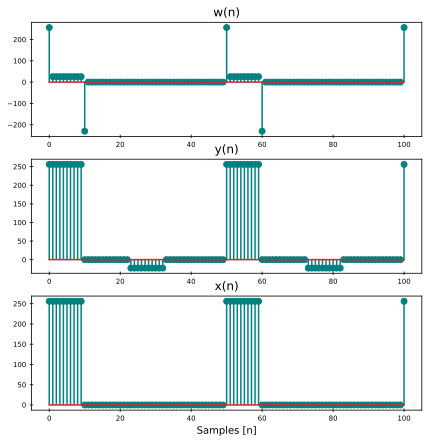

In [3]:
# build restoration filter cooeficients
M = 22
l = np.arange(0, M + 1, dtype=np.int8)
r = 0.9**l

# Apply impulse response of filter 2
y_n = np.convolve(r, w_n)

#Plot the input, output, and original signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 7))
stem_plot(ax1, n, w_n[:-1])
stem_plot(ax2, n, y_n[: -M - 1])
stem_plot(ax3, n, x_n)

ax1.set_title("w(n)")
ax2.set_title("y(n)")
ax3.set_title("x(n)")
ax3.set_xlabel("Samples [n]");

# (c) 

Since the objective of the restoration filter is to produce a y[n] that is almost identical to x[n], make a plot of the error (difference) between x[n] and y[n] over the range $0 < n < 50$.

Text(0.5, 16.878125000000008, 'Samples [n]')

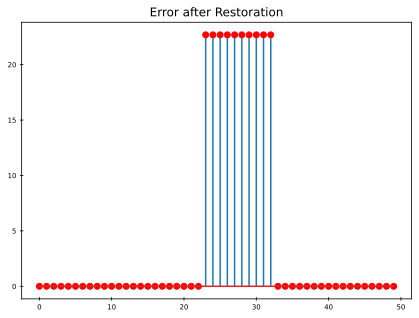

In [4]:
#Grab the error of the first 50 elements
error = np.abs(y_n[:50] - x_n[:50])

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.stem(error, markerfmt="red")
ax.title.set_text("Error after Restoration")
ax3.set_xlabel("Samples [n]")

# 3.1.2 - Worst-Case Error
----
# (a) 
Evaluate the worst-case error by doing the following: use MATLAB’s max() function to find the maximum of the difference between y[n] and x[n] in the range $0 < n < 50$.

# (b) 
What does the error plot and worst case error tell you about the quality of the restoration of x[n]? How small do you think the worst case error has to be so that it cannot be seen on a plot?

In [5]:
#Compute the max error of the deconvolution
max_error = np.max(error[0:50])
print(f"Maximum Error found is {max_error:.3f}")

Maximum Error found is 22.689


The error plot will show how effective the deconvolution/restoration operation is. The maximum error can be used as a threshold for a certain application to allow us to determine how high an order of a deconvolution filter we need. Increasing M, the filter order, has shown to create a better deconvolution operation. In order to no longer see the error in our plots, the value of error would need to be smaller than 0.1. Anything smaller than 0.1 would be hard to detect with the markers for the stem plot. 

# 3.1.3 - An Echo Filter
-------

The following FIR filter can be interpreted as an echo filter.
$$y_1[n] = x_1[n] + rx_1[n-P]$$

Explain why this is a valid interpretation by working out the following:

# (a) 
You have an audio signal sampled at $f_s = 8000 Hz$ and you would like to add a delayed version of the signal to simulate an echo. The time delay of the echo should be 0.2 seconds, and the strength of the echo should be 90% percent of the original. Determine the values of r and P in (4); make P an integer.

To solve this we must known how many samples we are offsetting by with the 0.2 seconds of delay. Since we are sampling at 8000 Hz which is 8000 samples/sec, then we are offsetting by: $8000 samples/sec * 0.2 sec = 1600 samples$. Therefore, P should be 1600. Since the signal should be at 90% of its value then r should be 0.9. Giving the echo filter equation:

$$y_1[n] = x_1[n] + 0.9 \ x_1[n-1600]$$

In [6]:
# playback original data before filtering
orig_data = loadmat("data/labdat.mat")["x2"].squeeze()
orig_wavfile = "data/outputs/labdat.wav"
fs = 8000  # sampling rate

wavfile.write(orig_wavfile, fs, orig_data)
display.Audio(orig_wavfile)

# (b) 

Describe the filter coefficients of this FIR filter, and determine its length.
A FIR filter is in the form:
$$y[n] = \sum_{k=0}^{M} = b_k x[n-k]$$

with $b_k$ being the coefficients of the filter. This means that k = 1600 here and therefore the coefficients range from k=0 to 1600. Therefore the length of the filter is 1601.
The coefficients are  
`bb = [1; zeros(1599); 0.9]`

In [7]:
td = 0.2  # time delay of echo in seconds
echo_amp = 0.9  # amplitude of echo

samp_delay = int(fs * td)  # total number of samples to delay the echo by
# create filter cooeficients
bk = np.zeros(samp_delay, dtype=float)
bk[0] = 1
bk[samp_delay - 1] = echo_amp

# apply filter to input data to create echo
echo_data = np.convolve(orig_data, bk)
echo_data_scaled = np.int16(echo_data / np.max(np.abs(echo_data)) * 32767)

# create wavfile and playback
echo_wavfile = "data/outputs/Echo_data.wav"
wavfile.write(echo_wavfile, fs, echo_data_scaled)

display.Audio(echo_wavfile)

In [ ]:
from IPython.display import display, HTML
from ipylab import JupyterFrontEnd
import subprocess

app = JupyterFrontEnd()

display(
    HTML(
        "<style>"
        ".jp-Cell { overflow-x: visible; overflow: visible; "
        "width: 95%; max-width: 960px; "
        "margin-left: auto; margin-right: auto; }"
        "img {"
        "width: 90%;"
        "height: 100%;}"
        ".jp-Cell-inputWrapper { width: 95%; overflow-x: visible; overflow: visible;}"
        "</style>"
    )
)

app.commands.execute("docmanager:save")
subprocess.run("jupyter nbconvert --to html main.ipynb", shell=True)
app.commands.execute("docmanager:save");